In [144]:
import numpy as np
import scipy
import scipy.spatial
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette = 'Set2')


In [145]:
penguins_df = pd.read_csv("./penguins.csv")
penguins_df.info()
penguins_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [146]:
penguins_df.dropna(inplace=True)
penguins_df = penguins_df[(penguins_df.sex != '.')]
penguins_df.reset_index(inplace=True, drop=True)
penguins_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [147]:
penguins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
culmen_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


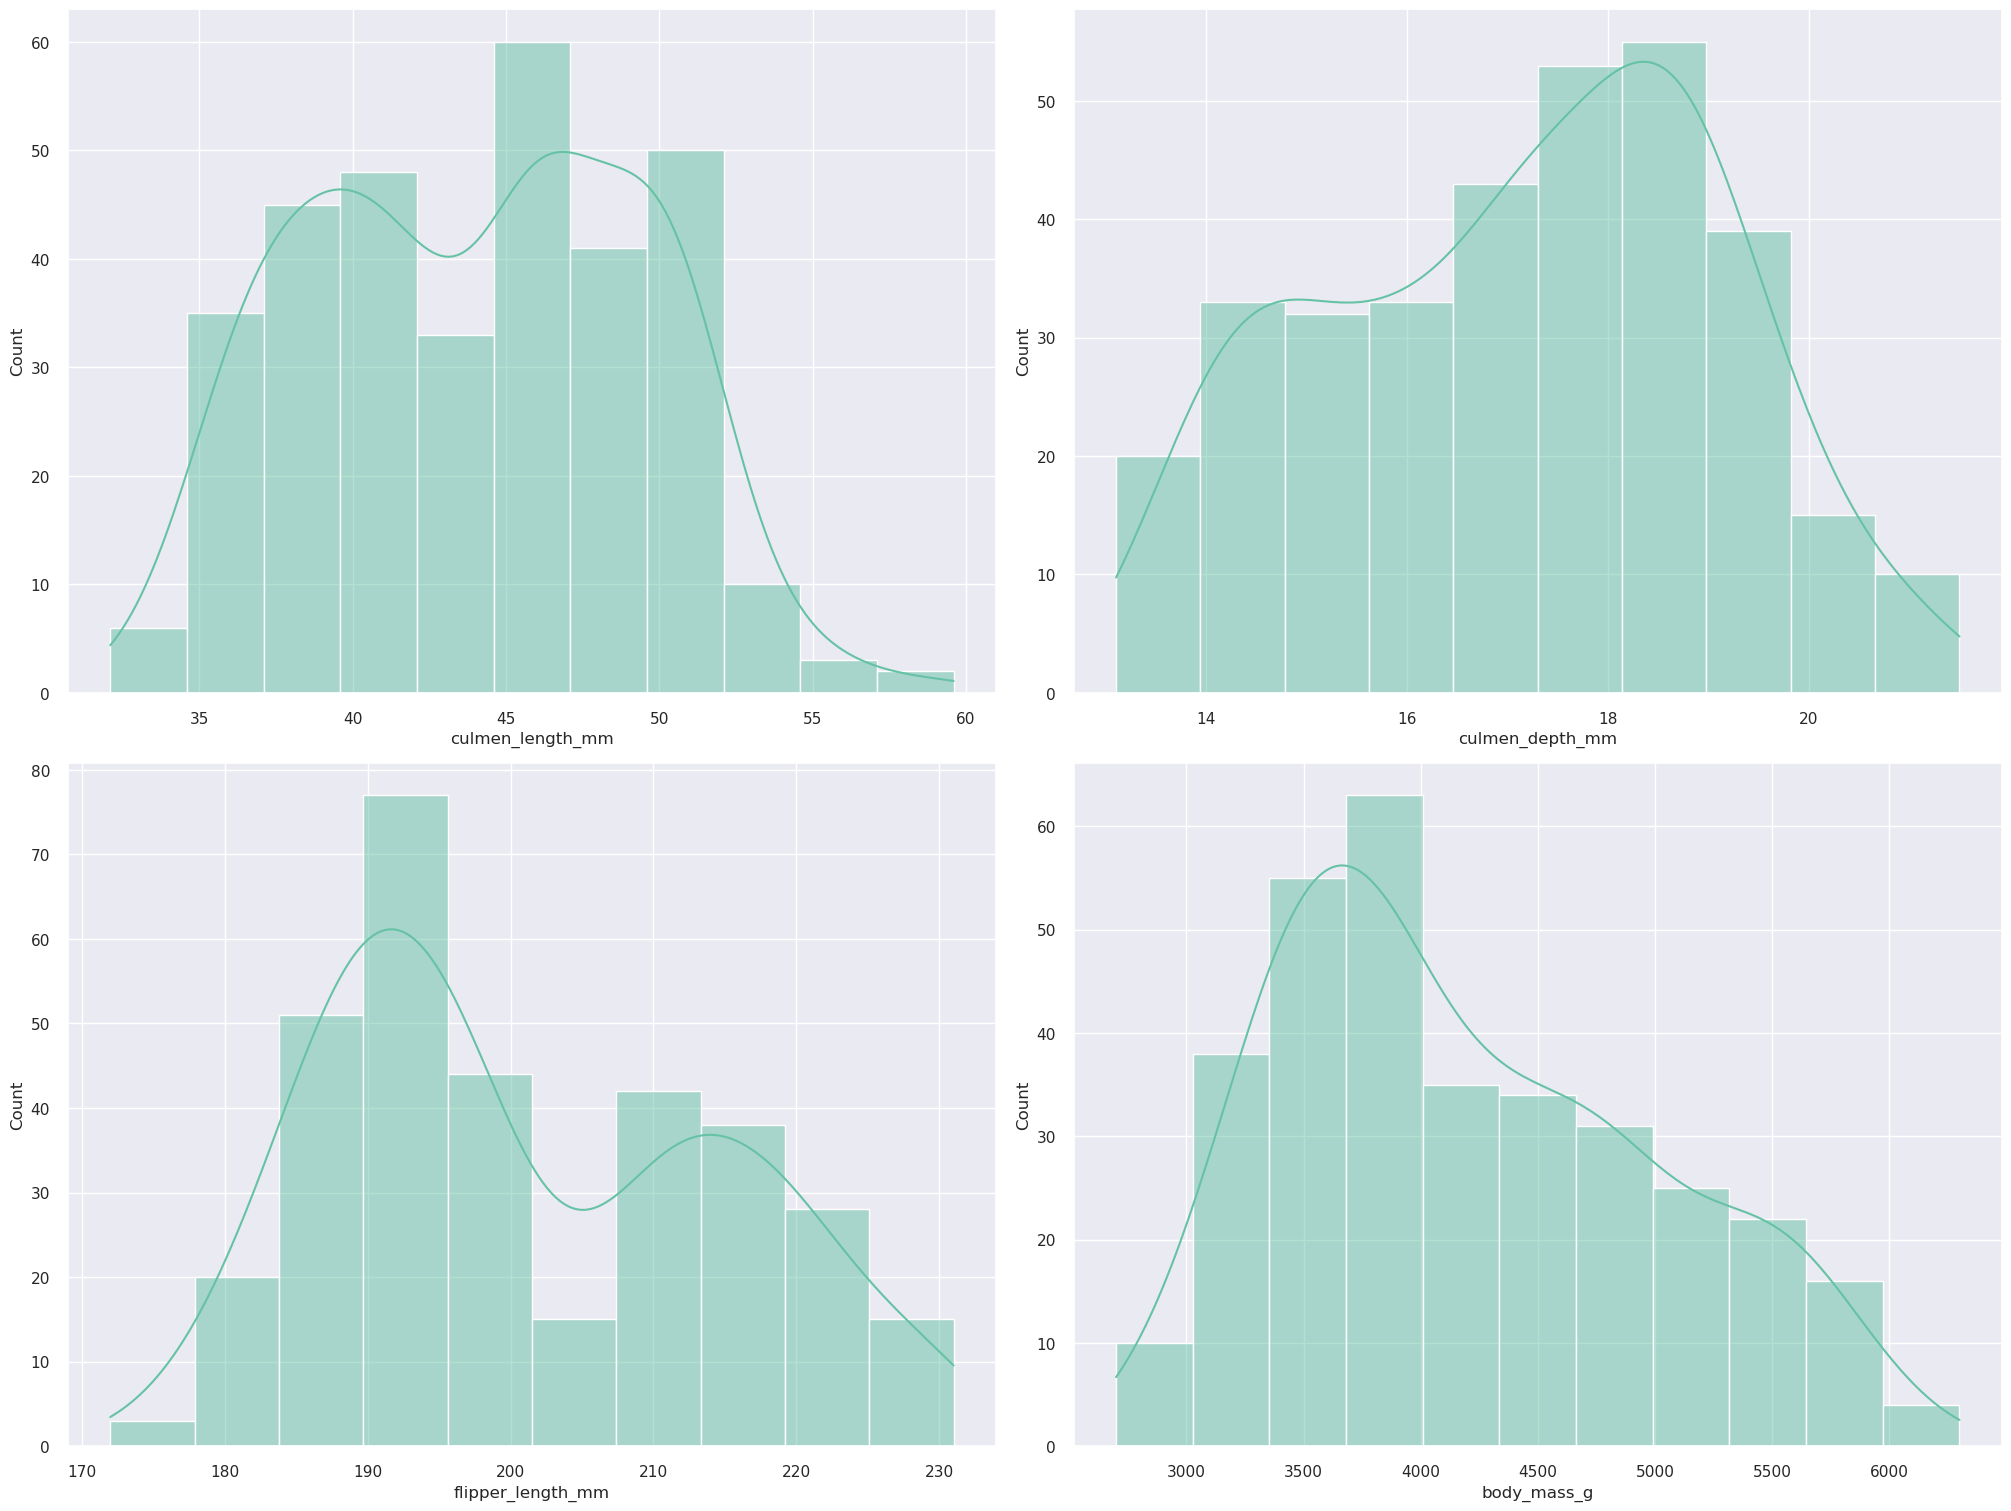

In [148]:
fig, ax = plt.subplots(2,2, figsize=(20,15), constrained_layout=True)
ax=ax.flatten()
int_cols= penguins_df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(x=penguins_df[i], ax=ax[x], kde=True)

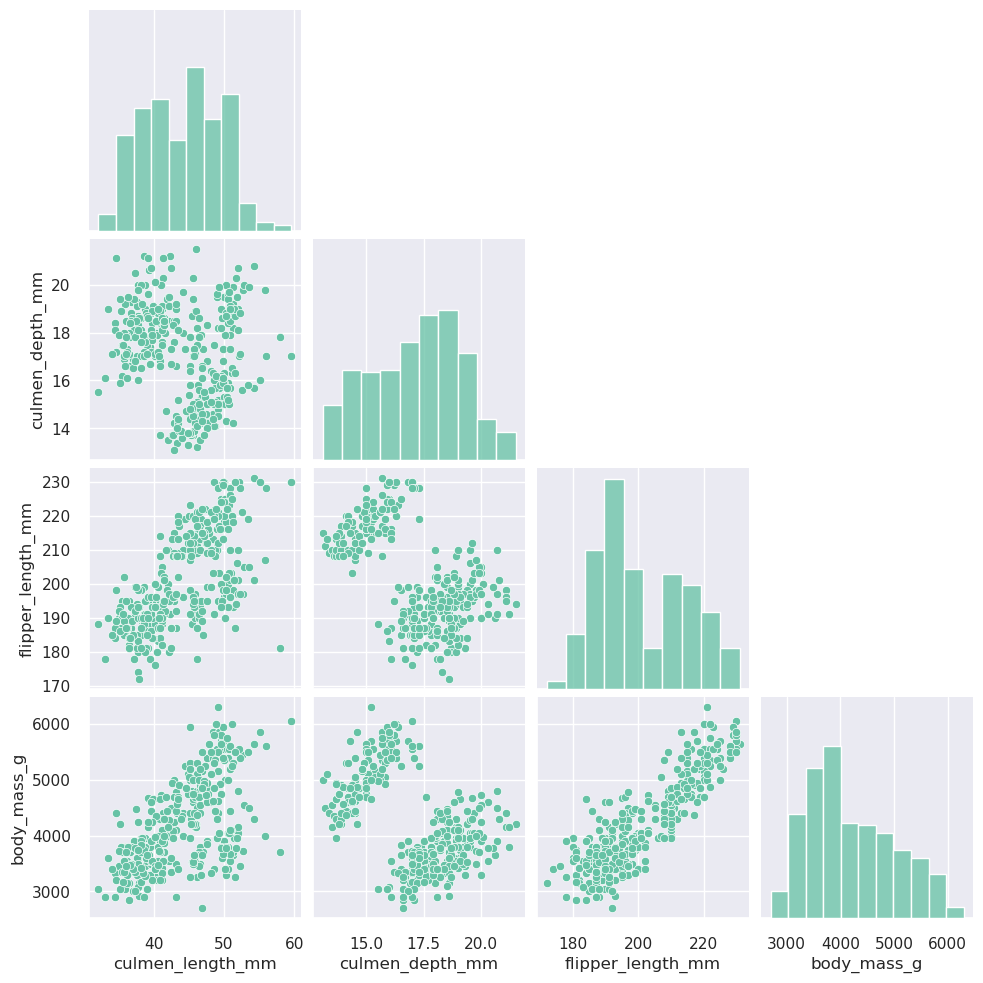

In [149]:
g = sns.pairplot(penguins_df, kind='scatter', diag_kind='hist', corner=True)

In [150]:
attribs = ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
num_attribs = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
cat_attribs = ["island", "sex"]

In [151]:
from sklearn.preprocessing import StandardScaler

penguins_df_num=penguins_df[num_attribs]
num_attribs_standardized = [x + '\'' for x in num_attribs]

scaler = StandardScaler()
penguins_df_num_standardized = pd.DataFrame(scaler.fit_transform(penguins_df_num), columns=num_attribs_standardized)
penguins_df_num_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm',333.0,1.026873e-16,1.001505,-2.177987,-0.822788,0.092887,0.843741,2.858227
culmen_depth_mm',333.0,3.267323e-16,1.001505,-2.067291,-0.795852,0.068726,0.780732,2.204743
flipper_length_mm',333.0,5.697811e-16,1.001505,-2.069852,-0.783651,-0.283462,0.859828,2.146028
body_mass_g',333.0,2.360474e-16,1.001505,-1.874435,-0.817229,-0.195343,0.706392,2.603144


In [152]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

penguins_df_num_standardized = penguins_df[num_attribs].copy()

penguins_df_num_standardized['body_mass_g'] = StandardScaler().fit_transform(penguins_df[['body_mass_g']])
penguins_df_num_standardized['culmen_depth_mm'] = StandardScaler().fit_transform(penguins_df[['culmen_depth_mm']])

qt = QuantileTransformer(n_quantiles=20, output_distribution='normal')
penguins_df_num_standardized['culmen_length_mm'] = StandardScaler().fit_transform(qt.fit_transform(penguins_df[['culmen_length_mm']]))
penguins_df_num_standardized['flipper_length_mm'] = StandardScaler().fit_transform(qt.fit_transform(penguins_df[['flipper_length_mm']]))

In [153]:
penguins_df_num_standardized

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.726463,0.780732,-1.606701,-0.568475
1,-0.644306,0.119584,-1.099607,-0.506286
2,-0.516221,0.424729,-0.212733,-1.190361
3,-1.235873,1.085877,-0.344678,-0.941606
4,-0.684793,1.747026,-0.631640,-0.692852
...,...,...,...,...
328,0.478538,-1.762145,0.697921,0.892957
329,0.406420,-1.457000,0.755177,0.799674
330,1.112165,-0.744994,1.305307,1.919069
331,0.068812,-1.202712,0.590332,1.234995


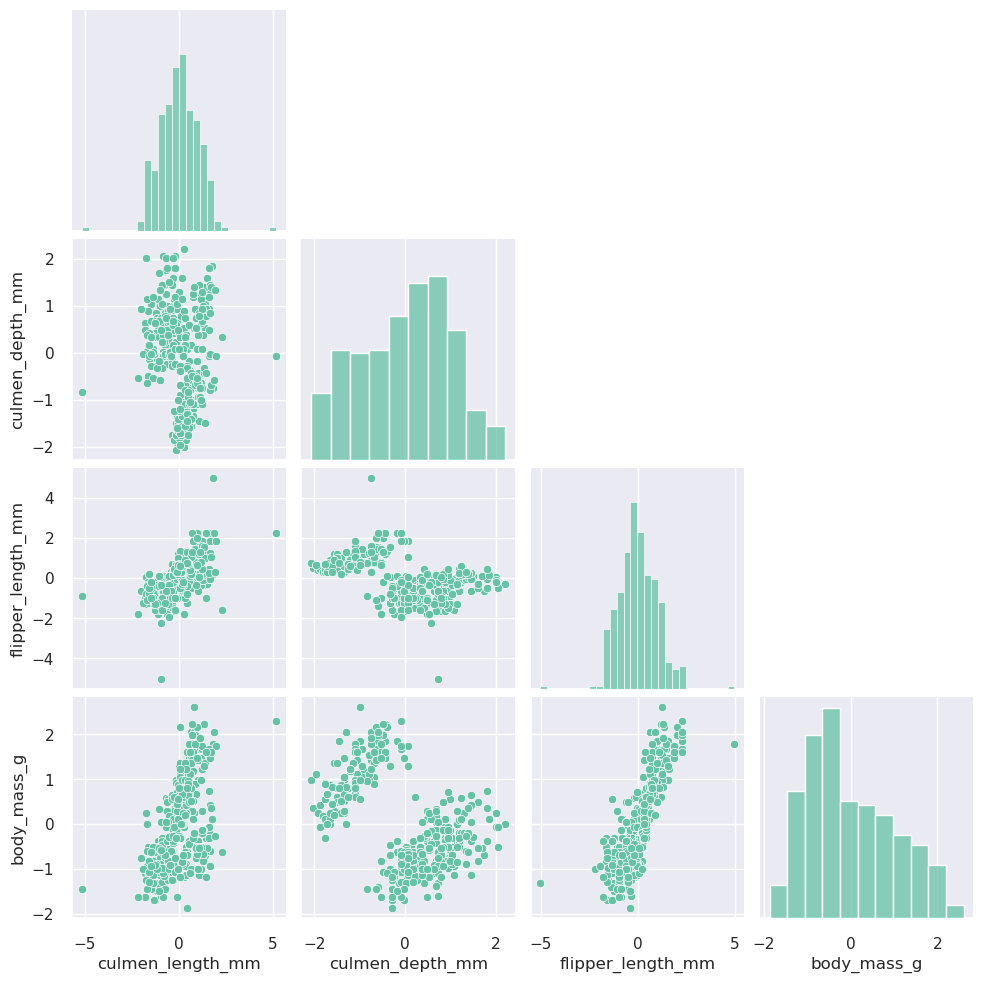

In [154]:
g = sns.pairplot(penguins_df_num_standardized, kind='scatter', diag_kind='hist', corner=True)

In [155]:
corr_matrix = penguins_df_num_standardized.corr()
corr_matrix

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.162952,0.604954,0.562677
culmen_depth_mm,-0.162952,1.000000,-0.463386,-0.472016
flipper_length_mm,0.604954,-0.463386,1.000000,0.812424
body_mass_g,0.562677,-0.472016,0.812424,1.000000


Selecionando dados categóricos

In [156]:
penguins_df_cat=penguins_df[cat_attribs]
penguins_df_cat_1h = pd.get_dummies(penguins_df_cat)
penguins_df_cat_1h.head()

,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,0,1,0,1
1,0,0,1,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,0,1,0,1


In [157]:
penguins_df_standardized = penguins_df_num_standardized.join(penguins_df_cat_1h)
penguins_df_standardized

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,-0.726463,0.780732,-1.606701,-0.568475,0,0,1,0,1
1,-0.644306,0.119584,-1.099607,-0.506286,0,0,1,1,0
2,-0.516221,0.424729,-0.212733,-1.190361,0,0,1,1,0
3,-1.235873,1.085877,-0.344678,-0.941606,0,0,1,1,0
4,-0.684793,1.747026,-0.631640,-0.692852,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
328,0.478538,-1.762145,0.697921,0.892957,1,0,0,1,0
329,0.406420,-1.457000,0.755177,0.799674,1,0,0,1,0
330,1.112165,-0.744994,1.305307,1.919069,1,0,0,0,1
331,0.068812,-1.202712,0.590332,1.234995,1,0,0,1,0


## Kmeans

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

np.random.seed(0)

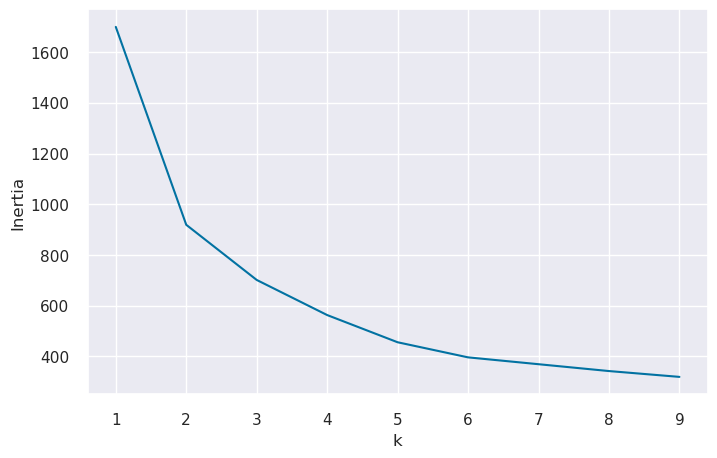

In [159]:
def plot_inertia(df, kmin=1, kmax=10, figsize=(8, 5)):
    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k, random_state=10)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    
plot_inertia(penguins_df_standardized)

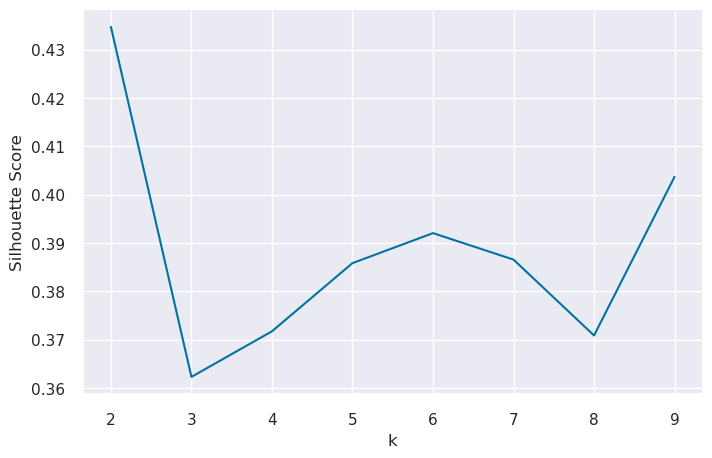

In [160]:
def plot_silhouette_score(df, kmin=2, kmax=10, figsize=(8, 5)):
    _range = range(kmin, kmax)
    silhouette_scores = []
    for k in _range:
        kmeans = KMeans(n_clusters=k, random_state=10)
        kmeans.fit(df)
        silhouette_scores.append(silhouette_score(df, kmeans.labels_))

    plt.figure(figsize=figsize)
    plt.plot(_range, silhouette_scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.show()
    
plot_silhouette_score(penguins_df_standardized)


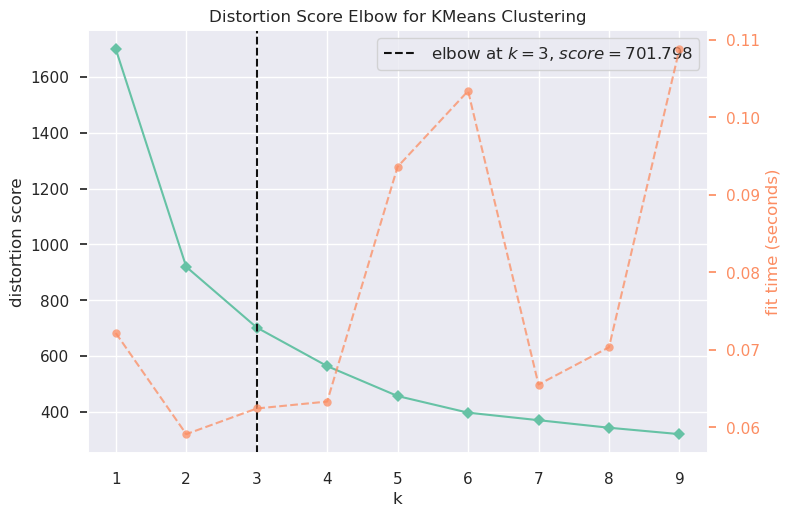

In [161]:
kmeans = KMeans(random_state=10)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(penguins_df_standardized); 
visualizer.poof();

/home/victor/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


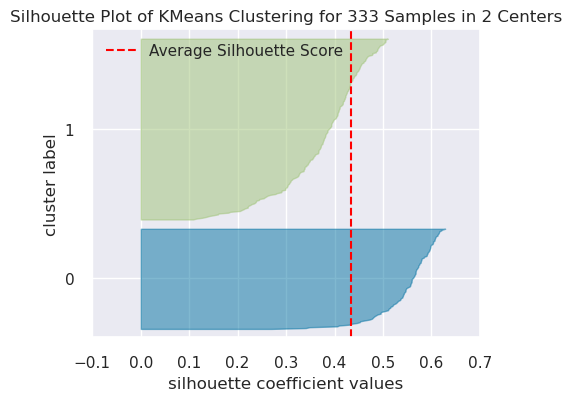

In [162]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit(penguins_df_standardized)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(kmeans, ax=ax, colors='yellowbrick')
visualizer.fit(penguins_df_standardized)
visualizer.show();

/home/victor/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


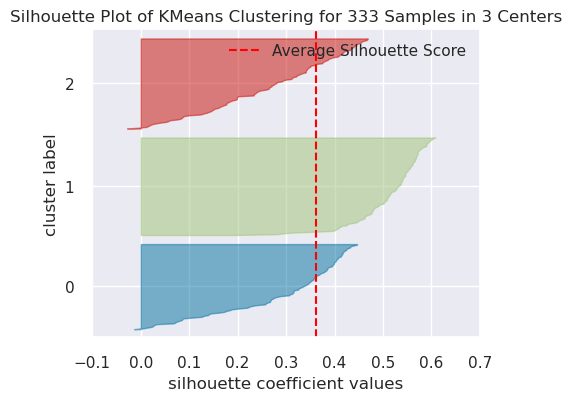

In [163]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit(penguins_df_standardized)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(kmeans, ax=ax, colors='yellowbrick')
visualizer.fit(penguins_df_standardized)
visualizer.show();

/home/victor/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


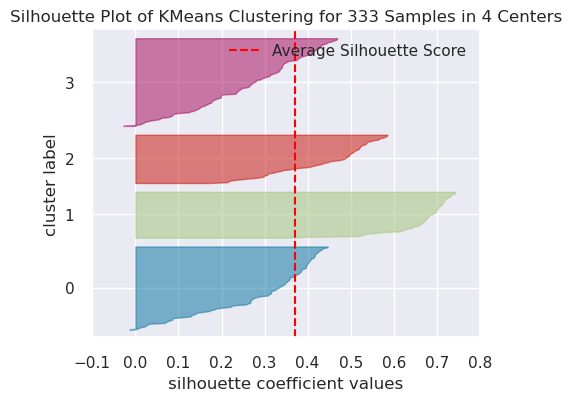

In [164]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit(penguins_df_standardized)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(kmeans, ax=ax, colors='yellowbrick')
visualizer.fit(penguins_df_standardized)
visualizer.show();

/home/victor/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


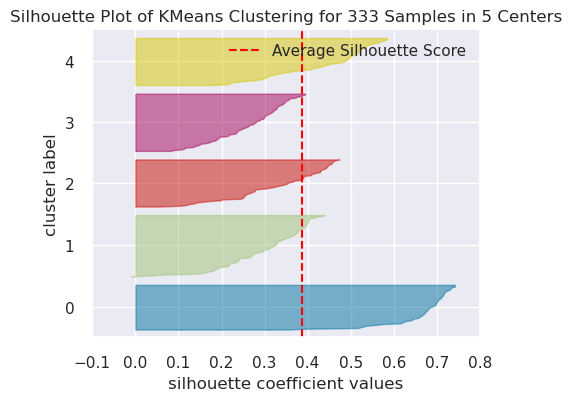

In [165]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=10)
kmeans.fit(penguins_df_standardized)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(kmeans, ax=ax, colors='yellowbrick')
visualizer.fit(penguins_df_standardized)
visualizer.show();

In [175]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(penguins_df_standardized)


dbscan =  DBSCAN(eps=1.433)
dbscan_labels = dbscan.fit_predict(penguins_df_standardized)



cluster_df = penguins_df_standardized.copy()
cluster_df['kmeas_cluster'] = kmeans_labels
cluster_df['dbscan_cluster'] = dbscan_labels


print(cluster_df['kmeas_cluster'].value_counts())
print(cluster_df['dbscan_cluster'].value_counts())

cluster_df.sample(10)





1    119
0    110
2    104
Name: kmeas_cluster, dtype: int64
 0    211
 2     59
 1     58
-1      5
Name: dbscan_cluster, dtype: int64


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE,kmeas_cluster,dbscan_cluster
115,-0.999337,1.340165,0.042998,-0.879418,0,0,1,0,1,0,0
87,-0.624465,0.475587,-1.099607,0.302166,0,1,0,0,1,0,0
215,0.997410,-0.439849,2.269539,1.856881,1,0,0,0,1,1,2
140,-0.705471,0.729875,-0.631640,0.053411,0,1,0,0,1,0,0
3,-1.235873,1.085877,-0.344678,-0.941606,0,0,1,1,0,2,0
173,0.853432,0.933305,0.128350,-0.506286,0,1,0,0,1,0,0
99,-0.608567,0.882447,-1.311472,-0.817229,1,0,0,0,1,2,0
144,-1.470072,-0.032989,-0.987937,-0.630663,0,1,0,1,0,2,0
229,0.800667,-0.744994,0.900504,2.043446,1,0,0,0,1,1,2
11,-0.809398,0.933305,-0.212733,-0.941606,0,0,1,1,0,2,0


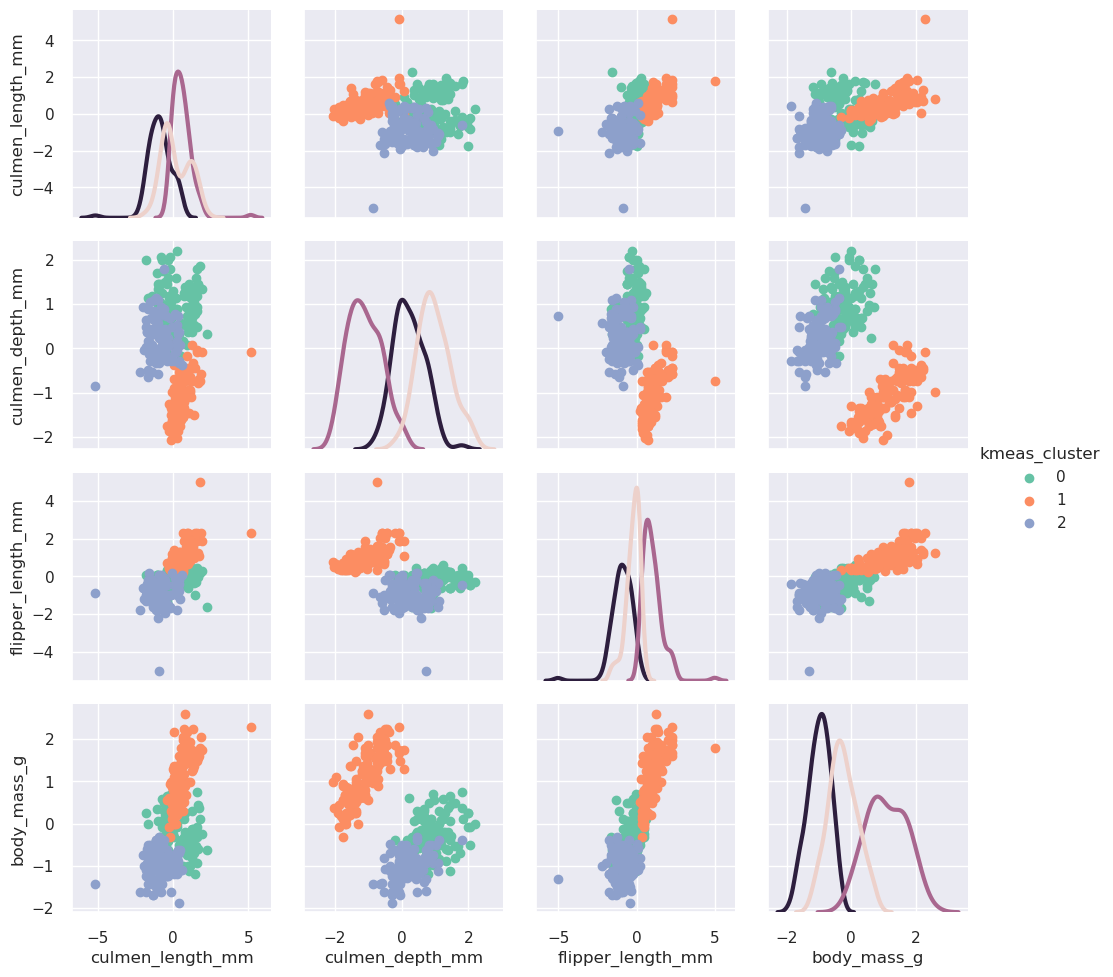

In [180]:
g = sns.PairGrid(cluster_df, vars=num_attribs, hue='kmeas_cluster')
g.map_diag(sns.kdeplot, lw=3)
g.map_offdiag(plt.scatter)
#g.map(plt.scatter) todas as celulas serao scatter.
g.add_legend()

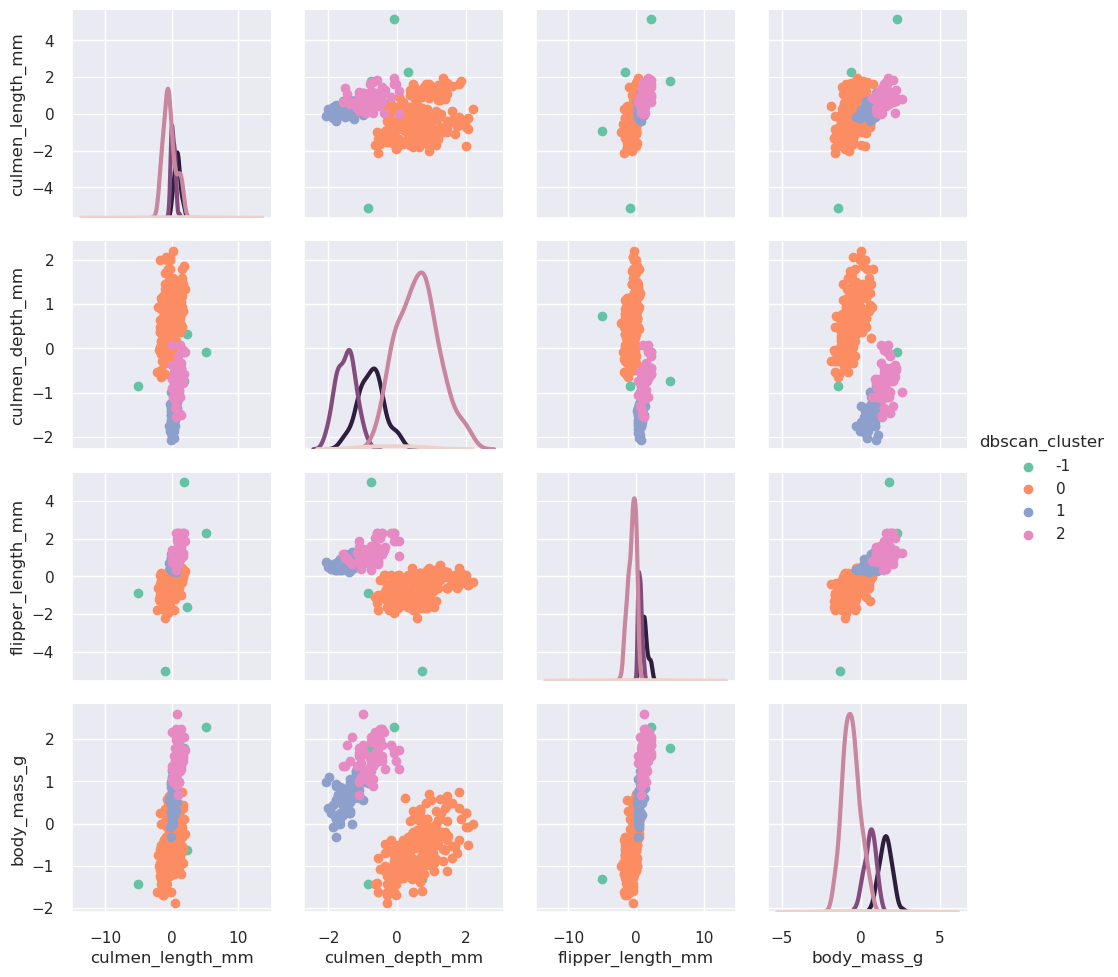

In [181]:
g = sns.PairGrid(cluster_df, vars=num_attribs, hue='dbscan_cluster')
g.map_diag(sns.kdeplot, lw=3)
g.map_offdiag(plt.scatter)
#g.map(plt.scatter) todas as celulas serao scatter.
g.add_legend()